# Домашня робота 3 
# #                       Класичне машинне навчання

# Завдання:
Дане домашнє завдання буде повністю пов'язане з лінійною регресією та її реалізацією.  
Отож розіб'ємо наше домашнє завдання на декілька частин:  
1. Напишіть функцію гіпотези лінійної регресії у векторному вигляді;   
2. Створіть функцію для обчислення функції втрат у векторному вигляді;     
3. Реалізуйте один крок градієнтного спуску;     
4. Знайдіть найкращі параметри w для датасету(Housing.csv) прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;     
5. Знайдіть ці ж параметри за допомогою аналітичного рішення;    
6. Порівняйте отримані результати. 

# Імпорт необхідних модулів

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Матриці Теорія

Якщо у вас є набір даних з $m$ вибірок, кожна з яких називається $x^{(i)}$ ($n$-вимірний вектор), і вектор результатів $ Y $ ($m$-вимірний вектор), можна побудувати наступні матриці :

1.Матриця ознак

$$\mathbf{X} =
\begin{pmatrix}
\vec{x}^{(1)} \\
\vec{x}^{(2)} \\
\vdots \\
\vec{x}^{(m)} 
\end{pmatrix} =
\begin{pmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \ldots & x_n^{(m)} 
\end{pmatrix}$$


2.Вектор результатів

$$\vec{Y} = 
\begin{pmatrix}
\vec{y}_1 \\
\vec{y}_2 \\
\vdots\\
\vec{y}_m \\
\end{pmatrix}$$
  

3. Вектор вагових коефіцієнтів

$$\vec{w} = 
\begin{pmatrix}
\vec{w}_0 \\
\vec{w}_1 \\
\vdots\\
\vec{w}_n \\
\end{pmatrix}$$

# 1. Напишіть функцію гіпотези лінійної регресії у векторному вигляді

Лінійна регресія моделює лінійну залежність між вхідними ознаками та вихідними значеннями за допомогою рівняння: 

   Функція має вигляд:
    $$ \vec{h}(\vec{w}, X) = X \vec{w}, $$
    "де  $ \vec{w} $ --- вектор вагових коефіцієнтів, $ X $ --- вектор-стовпець векторів ознак (матриця ознак)."

Основні гіпотези лінійної регресії:  
1.Лінійність: Залежність між незалежними та залежними змінними є лінійною.  
2.Незалежність: Спостереження незалежні одне від одного.  
3.Гомоскедастичність: Варіанс помилок є сталим для всіх спостережень.   
4.Нормальність: Помилки нормально розподілені.  
Ці гіпотези є основою для проведення статистичних тестів і оцінки якості моделі.  

In [343]:

def func_hypothesis(W: np.array, X: np.array) -> np.array:
  """
    Функція гіпотези лінійної регресії у векторному вигляді.

    Параметри:
    X : Матриця вхідних даних (m x n), де m - кількість зразків, n - кількість ознак.
    w : Вектор ваг (n, 1).

    Повертає:
    Вектор передбачених значень (m, 1).
    """
  
  return np.dot(X, W) #  обчислення матричного добутку, return X @ w - ще одний запис того самого.


# 2. Створіть функцію для обчислення функції втрат у векторному вигляді; 

## Функція втрат теорія.
    
    Функція має вигляд:
    
$$ J(\vec{w}) = \frac1{2m} \left( \vec{h}(\vec{w}, \mathbf{X}) - \vec{Y} \right)^2. $$
   
Функція втрати (loss function) є однією з ключових компонентів в задачах машинного навчання і глибокого навчання, і вона виконує декілька важливих функцій:
   1. __Вимірювання помилки моделі__: Функція втрати визначає, наскільки добре модель попереджує або класифікує дані в порівнянні зі справжніми (очікуваними) значеннями. Вона обчислює різницю між прогнозованими і справжніми результатами. Ця різниця, яку часто називають \"помилкою\" або \"втратою\", вказує на те, наскільки великою є розрозненість між моделлю та даними.  
    
   2. __Оптимізація моделі__: Однією з центральних задач в машинному навчанні є оптимізація параметрів моделі так, щоб функція втрати була мінімізована. Іншими словами, ми намагаємося знайти такі значення параметрів моделі, які роблять прогнози якомога ближчими до справжніх даних. Це досягається шляхом зменшення значення функції втрати.   
    
   3. __Оцінка якості моделі__: Функція втрати дозволяє оцінювати якість моделі. Чим менше значення функції втрати, тим краще модель вирішує задачу. Виміряння втрати на навчальних та тестових даних допомагає визначити, наскільки добре модель узагальнює свої знання на нових даних."
   

In [344]:
def loss_function(W: np.array, X: np.array, Y: np.array) -> float:
    m = Y.shape[0]  # Кількість спостережень (навчальних прикладів)
    accuracy = (func_hypothesis(W, X) - Y)
    return np.dot(accuracy, accuracy ) / (2 * m) # Повертаємо з функції розраховане значення втрат 

# 3. Реалізуйте один крок градієнтного спуску.

### Градієнт функції втрат теорія


    Вектор-градієнт функції втрат  має вигляд:
$$ \vec{\nabla} J = \frac1{m} \mathbf{X}^{\mathrm{T}} \cdot (\mathrm{X}\vec{w} - \vec{Y} )  = \frac1{m} \mathbf{X}^{\mathrm{T}} \cdot (\vec{h} - \vec{Y} ). $$
   __Градієнт функції втрат__ (gradient of the loss function) - це вектор, який показує напрямок та швидкість найшвидшого зростання функції втрат в околицях поточного значення параметрів моделі. Іншими словаим, це вектор, який показує, як зміниться значення функції втрат при дуже невеликих змінах параметрів моделі.  
    Основні аспекти градієнту функції втрат:  
    * __Напрямок__: Градієнт вказує напрямок найшвидшого зростання функції втрат. Якщо ви рухаєтесь в напрямку градієнту, то значення функції втрат буде зростати найшвидше.  
    * __Величина__: Модуль градієнту (його довжина) показує, наскільки швидко зростає функція втрат в цьому напрямку. Більший градієнт вказує на більш значущі зміни в функції втрат при малих змінах параметрів моделі.    

    Використання градієнту функції втрат дуже важливо в процесі оптимізації моделі, так як він вказує на те, які кроки (зміни параметрів) потрібно зробити для покращення моделі. У методах оптимізації, таких як стохастичний градієнтний спуск, градієнт використовується для оновлення параметрів моделі з метою зменшення функції втрат.

In [345]:
def gradient_loss_function(W, X, Y):
    m = Y.shape[0]  # Кількість спостережень (навчальних прикладів)
    accuracy  = func_hypothesis(W, X) - Y  # Різниця між передбаченнями та реальними значеннями (похибка)
    gradient = (1 / m) * np.dot(X.T, accuracy )  # Градієнт
    return gradient
    

### Функція градієнтного спуску

Формула для обчислення вагових коефіцієнтів в результаті одного кроку градієнтного спуску (одна ітерація) має вигляд:

 $$ \vec{w} = \vec{w}_{\text{prev}} - \alpha \vec{\nabla} J $$

In [346]:
def gradient_descent(X, Y, alpha=0.001, num_iterations=1_000, epsilon=1e-7):
    """Функція градієнтного спуску"""
   
    
    n = X.shape[1]  # Кількість ознак (у цьому випадку 3: area, bedrooms, bathrooms)
        
    W = np.random.randn(n) # Ініціалізуємо вагові коефіцієнти випадковими значеннями
    
    loss_function_0 = loss_function(W, X, Y)  # Обчислюємо початкову вартість
    
    history_loss_function = [loss_function_0] # Задаємо початковий елемент списку(початкову вартість)
    
    for _ in range(num_iterations):       
        
        W -= alpha * gradient_loss_function(W, X, Y)  # Оновлюємо коефіцієнти
        # де 
        #   *alpha: Це коефіцієнт навчання (learning rate), який визначає, наскільки великим буде крок у напрямку градієнта. 
        #          Якщо він занадто великий, ви можете "перепригнути" мінімум, а якщо занадто малий — навчання буде повільним.
        #    *W -= ... , оновлює ваги шляхом віднімання від них обчисленого значення.
        
        loss_function_current = loss_function(W, X, Y) # Обчислюємо нову вартість
        
        history_loss_function.append(loss_function_current) # Добавляємо до списку нову вартість.
        
        if np.abs(loss_function_current - loss_function_0) < epsilon: # Перевірка на збіжність (Виконуємо цикл доки  абсолютна різниця між значеннями функції втрат у двох сусідніх ітераціях не стане меншо за *epsilon)
                                              # *epsilon: Це поріг, який визначає, наскільки малі зміни в значенні функції втрат вважаються незначними. 
                                              # Якщо зміна менша за цей поріг, це вказує на те, що модель досягла стабільності.
            break
        
        loss_function_0 = loss_function_current # # Оновлюємо попередню вартість
        # Принципи машиного навчання :
        #           # Ефективність: Якщо модель вже досягла оптимального значення функції втрат, подальші ітерації можуть бути непотрібними та витрачати ресурси.
                    # Запобігання перенавчанню: Перевірка на збіжність допомагає уникнути ситуацій, коли модель продовжує навчатися, навіть коли це вже не є корисним.
        
    return W, history_loss_function # Повертаємо :  *W - Вектор ваг (коефіцієнтів) моделі, що були оптимізовані в процесі навчання. 
                                            # Це є результатом градієнтного спуску, який мінімізує функцію втрат.
                                    #   *history_loss_function: Список значень функції втрат (вартість) на кожній ітерації. Це дозволяє відстежувати, як змінюється вартість під час навчання, 
                                            # що може бути корисно для аналізу процесу навчання та візуалізації.


#                                                       # Практичні завдання 

Наша задача --- проаналізувати, як залежить ціна на будинок h залежно від площі S, кількості ванних кімнат  $x_1$,  та кількості спалень  $x_2$
.

In [347]:
df = pd.read_csv('Housing.csv')
X = df[['area', 'bedrooms', 'bathrooms']].to_numpy()
Y = df.price.to_numpy()

In [348]:
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    # Перевіряємо, що стандартне відхилення не дорівнює нулю
    std[std == 0] = 1
    
    normalized_X = (X - mean) / std
    return normalized_X, mean, std

### Нормалізація даних
Осікільки площа квартири $S=\text{area}$ на порядки відрізняється від кількості $x_1=\text{bedrooms}$ спалень і ваних  $x_2= \text{bathrooms}$ , необхідно виконати нормалізацію даних, щоб наша модель швидше навчалась.
 
Нормалізацію виконаємо за формулою:
$$ \mathrm{X}^{\text{norm}} = \frac{\mathrm{X} - \overline{\mathrm{X}}}{\sigma}, $$
де $\overline{\mathrm{X}}$ - середнє (за стовбчиком), $\sigma$ - дисперсія (стандртне відхилення)

In [349]:
# Нормалізуємо ознаки
X_n, mean, std = normalize_features(X)

# Додаємо стовпець з одиницями для вільного члена (bias)
X_n = np.column_stack([np.ones(len(X)), X_n])


In [350]:
# Викликаємо функцію градієнтного спуску

learned_weights, history_loss_function = gradient_descent(X_n, Y, num_iterations=100_000)

# Відновлюємо ненормалізовані ваги
intercept = learned_weights[0]
coefficients = learned_weights[1:] / std

### метод градієнтного спуску.

Вагові коефіцієнти після градієнтного спуску

In [351]:
print(f"Вільний член (intercept): {intercept}")
print(f"Градієнтний спуск :\n Коефіцієнти ознак  (area, bedrooms, bathrooms):\n     {coefficients}")

Вільний член (intercept): 4766729.23373378
Градієнтний спуск :
 Коефіцієнти ознак  (area, bedrooms, bathrooms):
     [3.78762797e+02 4.06821020e+05 1.38604797e+06]


Побудуємо графік для наочної візуалізації

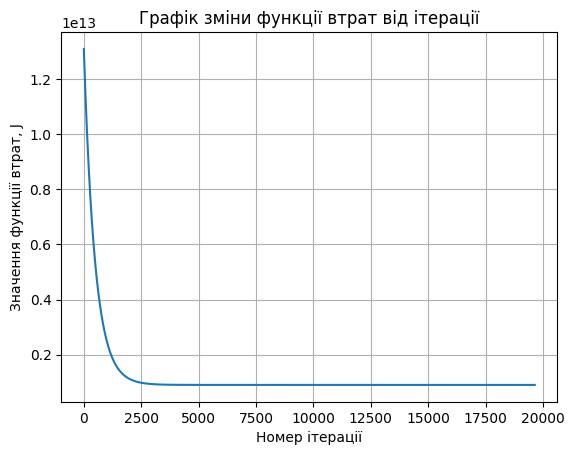

In [352]:
plt.plot(history_loss_function)
plt.xlabel('Номер ітерації')
plt.ylabel('Значення функції втрат, J')
plt.title('Графік зміни функції втрат від ітерації')
plt.grid(True)

plt.show()

### Метод аналітичного рішення

#### Теорія 

Аналітичний вираз для вектора вагових коефіцієнтів:

$$ \vec{w}^* = \left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)^{-1}\mathbf{X}^{\mathrm{T}} \vec{y}. $$

Аналітичний метод надає точні значення коефіцієнтів, але для знаходження вектора вагових коефіцієнтів за аналітичним методом потрібно обчислювати обернену матрицю $\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)^{-1}$, що може вимагати значних обчислювальних ресурсів. Зокрема, обчислення оберненої матриці має складність порядку $k^3$, де $k$ - розмірність матриці. Це може бути дуже витратним з обчислювальної точки зору.
Окрім того, якщо матриця $\mathbf{X}^{\mathrm{T}} \mathbf{X}$ є погано обумовленою, це означає, що власні числа цієї матриці близькі до нуля. Погано обумовлена матриця може виникнути, наприклад, коли деякі ознаки (стовпці матриці $\mathbf{X}$) мають високу кореляцію або колінеарність. У таких випадках обчислення оберненої матриці може бути непростим завданням, і воно може стати чисельно нестійким, що призводить до неточностей і неправильних результатів.
 
    
Отже, в реальних задачах машинного навчання, де матриця $\mathbf{X}^{\mathrm{T}} \mathbf{X}$ може бути погано обумовленою або великого розміру, аналітичний метод може бути невигідним через обчислювальну складність та чисельну нестійкість, і частіше використовуються інші методи оптимізації, такі як ітеративні методи (наприклад, градієнтний спуск), які є більш ефективними та стійкими до чисельних проблем.

In [353]:
# Аналітичне рішення для знаходження оптимальних параметрів
def analytical_solution(X, Y):
    """
    Функція для обчислення оптимальних ваг з допомогою аналітичного рішення (нормальні рівняння).

    Параметри:
    X (numpy.ndarray): Матриця вхідних даних (m x n).
    Y (numpy.ndarray): Вектор істинних значень (m,).

    Повертає:
    numpy.ndarray: Вектор оптимальних ваг.
    """
    analitical_W = np.linalg.pinv(X.T @ X) @ X.T @ Y # Нормальні рівняння , де X.T -транспонування матриці X
    return analitical_W

# Обчислення ваг аналітично
weights_analytical = analytical_solution(X, Y)
print("Аналітичне рішення :\n Коефіцієнти ознак  (area, bedrooms, bathrooms):\n", weights_analytical)

Аналітичне рішення :
 Коефіцієнти ознак  (area, bedrooms, bathrooms):
 [3.72448352e+02 3.68974672e+05 1.37031315e+06]


### Алгоритми  методу найменших квадратів (МНК)
Алгоритми бібліотеки - sklearn.linear_model

In [354]:
regressor = LinearRegression().fit(X, Y)
h_sk = regressor.predict(X)

print("МНК із бібліотеки scisklearn.linear_model :\n Коефіцієнти ознак  (area, bedrooms, bathrooms):\n", regressor.coef_ )

МНК із бібліотеки scisklearn.linear_model :
 Коефіцієнти ознак  (area, bedrooms, bathrooms):
 [3.78762754e+02 4.06820034e+05 1.38604950e+06]


### Для аналізу правильності роботи наших алгоритмів візьмемо реальний приклад. 

Нехай площа нашої квартири S = 2400 м2 , має 2 спальню  $x_1=2$  і дві ванни $x_2=1$ 

In [355]:
my_X = np.array([[2400, 2, 1]])

Розрахунок вартості квартири функцією гіпотизи за кофіцієнтами градієнтного спуску

In [356]:
print(f"Ціна за квартиру {func_hypothesis(coefficients, my_X)[0]:.0f}")

Ціна за квартиру 3108721


Розрахунок вартості квартири функцією гіпотизи за кофіцієнтами аналітичного рішення.


In [357]:
print(f"Ціна за квартиру {func_hypothesis(weights_analytical, my_X)[0]:.0f}")

Ціна за квартиру 3002139


Розрахунок вартості квартири за функією з  бібліотеки scisklearn.linear_model

In [358]:
print(f"Ціна за квартиру {regressor.predict(my_X)[0]:.0f}")

Ціна за квартиру 2935549


# Висновки  
Відмінності в значеннях коефіцієнтів між методами (градієнтним спуском, аналітичним методом і МНК) може бути зумовлена відмінностями в підходах і параметрах кожного методу.

У цьому контексті:  

1. Градієнтний спуск - ітеративний метод, який залежить від початкової ініціалізації та параметрів навчання, таких як швидкість навчання. Результати можуть варіюватися залежно від цих факторів. 

2. Аналітичний метод - знаходить точне аналітичне рішення і не залежить від параметрів навчання.

3. Метод найменших квадратів (МНК) - також знаходить точне рішення і не вимагає налаштування параметрів навчання.

Відмінності у вагових коефіцієнтах можуть бути спричинені як відмінностями в методах оптимізації, так і в особливостях даних, таких як наявність викидів, шумів або кореляцій між ознаками. Однак важливо зазначити, що за правильного налаштування й обробки даних відмінності в коефіцієнтах між цими методами мають бути незначними, і всі три методи мають давати схожі результати в контексті лінійної регресії.